<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #2c3e50;">

  <h1 style="font-size: 32px; font-weight: 700; margin-bottom: 10px;">Lab 5 – Final Project </h1>

  <p style="font-size: 16px; margin: 0 0 10px 0;">
    <strong>Level:</strong> Intermediate &nbsp; | &nbsp;
    <strong>Estimated Duration:</strong> 2 hours &nbsp; | &nbsp;
    <strong>Category:</strong> Final Project
  </p>
  </div>



<div style="background: #f4f4f6; border-radius: 8px; padding: 20px; font-family: sans-serif; font-size: 16px; line-height: 1.6;">
  <h2 style="margin-top: 0; background: #2c3e50; color: white; padding: 10px 15px; border-radius: 5px 5px 0 0;">
    Table of Contents
  </h2>
  <ol style="padding-left: 20px; margin: 0;">
    <li><b>Objectives</b></li>
    <li><b>Key Concepts</b></li>
    <li><b>Theoretical Background</b></li>
      <ul> 
      <li>3.1 Part 1</li>
      </ul>
    <li><b>Environment Setup</b></li>
    <li><b>Implementation</b></li>
      <ul>
          <li>5.1 Environment</li>
          <li>5.1 Circuit construction</li>
          <li>5.1 Simulation</li>
      </ul>
    <li><b>Exercises</b></li>
    <li><b>Reflection</b></li>
    <li><b>Conclusion</b></li>
    <li><b>References</b></li>
  </ol>
</div>

<div style="background: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>1. Objectives</b>
  </p>
  <ul style="padding: 10px 20px; font-size:16px; margin:0;">
    <li><strong>Apply</strong> the knowledge acquired in Module 0 to build a fully functional quantum circuit.</li>
    <li><strong>Execute</strong> the implementation on a <em>real simulator</em> such as IBM Quantum.</li>
    <li><strong>Observe</strong> the impact of errors and how to detect them through measurements.</li>
    <li><strong>Understand</strong> the fundamentals of a quantum repetition code.</li>
  </ul>
</div>

<div style="background: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>2. Key Concepts</b>
  </p>
  <ul style="padding: 10px 20px; font-size:16px; margin:0;">
    <li><strong>Quantum Error Correction (QEC)</strong> as a method to protect quantum information from noise and decoherence.</li>
    <li>The concept of a <strong>Repetition Code</strong> as a simple yet powerful scheme to detect and correct bit-flip (<em>X</em>) errors.</li>
    <li>The use of <strong>ancilla qubits</strong> and <strong>syndrome measurements</strong> to identify and correct errors without destroying the encoded information.</li>
    <li>Implementation of the code using <em>Qiskit</em>, including circuit construction, simulation, and error analysis.</li>
  </ul>
</div>


<div style="background-color: #f9f9f9; border-left: 5px solid #2c3e50; padding: 20px 25px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #333; line-height: 1.6; box-shadow: 0 2px 6px rgba(0,0,0,0.1); border-radius: 8px; width: 100%; box-sizing: border-box;">

  <h2 style="margin-top: 0; color: #2c3e50;">3. Theoretical Background</h2>

  <h4 style="font-size:18px; margin-bottom:10px; color:#2c3e50;">3.1 Introduction to Quantum Error Correction</h4>
  <p style="font-size:16px;">
    Quantum computers manipulate information stored in <strong>qubits</strong>, which can exist in superposition states such as 
    <code>α|0⟩ + β|1⟩</code>.  
    However, qubits are extremely fragile: any interaction with their environment can introduce <em>noise</em>, altering their amplitudes or phases.
    This loss of quantum coherence, known as <strong>decoherence</strong>, makes reliable computation impossible unless we find ways to detect and mitigate such errors.
  </p>
  <p style="font-size:16px;">
    The challenge is that, unlike classical bits, qubits cannot be directly observed without collapsing their state.  
    Therefore, <strong>Quantum Error Correction (QEC)</strong> aims to protect information <em>without directly measuring the encoded qubits</em>.  
    Instead, QEC introduces additional qubits and structured measurements that reveal only whether an error occurred, not the value of the qubit itself.
  </p>
  <p style="font-size:16px;">
    The most common error types are:
    <ul style="font-size:16px; line-height:1.6;">
      <li><strong>Bit-flip errors (X):</strong> invert |0⟩ ↔ |1⟩, analogous to a classical bit flip.</li>
      <li><strong>Phase-flip errors (Z):</strong> change the relative phase, transforming |+⟩ into |−⟩.</li>
      <li><strong>Combined errors (Y):</strong> a simultaneous bit- and phase-flip, corresponding to the Pauli-Y operator.</li>
    </ul>
  </p>
  <p style="font-size:16px;">
    The simplest QEC code capable of handling bit-flip errors is the <strong>3-qubit repetition code</strong>, 
    which you will implement in this Lab.
  </p>

  <h4 style="font-size:18px; margin-bottom:10px; color:#2c3e50;">3.2 Encoding a Logical Qubit</h4>
  <p style="font-size:16px;">
    The idea of an <strong>encoding</strong> is to distribute the information of a single logical qubit among multiple 
    <strong>physical qubits</strong> so that local errors can be identified collectively.  
    In the 3-qubit repetition code, one logical qubit is represented as:
  </p>
  <p style="font-size:16px; text-align:center;">
    <code>|0⟩<sub>L</sub> = |000⟩        |1⟩<sub>L</sub> = |111⟩</code>
  </p>
  <p style="font-size:16px;">
    Any superposition <code>α|0⟩ + β|1⟩</code> can thus be encoded as:
  </p>
  <p style="font-size:16px; text-align:center;">
    <code>|ψ⟩<sub>L</sub> = α|000⟩ + β|111⟩</code>
  </p>
  <p style="font-size:16px;">
    In practice, we can create this encoding using two <strong>CNOT gates</strong>.  
    Starting with a single qubit in state <code>|ψ⟩</code> and two auxiliary qubits initialized to |0⟩, we apply:
    <ol style="font-size:16px; line-height:1.6;">
      <li>A <strong>Hadamard gate</strong> (if we want |+⟩ = (|0⟩ + |1⟩)/√2).</li>
      <li>A CNOT from the first to the second qubit.</li>
      <li>A CNOT from the first to the third qubit.</li>
    </ol>
    The result is an <strong>entangled state</strong> where the information is spread coherently across three qubits:
  </p>
  <p style="font-size:16px; text-align:center;">
    <code>|+⟩ → (|000⟩ + |111⟩)/√2</code>
  </p>
  <p style="font-size:16px;">
    This encoding is not a simple duplication—something forbidden by the <strong>no-cloning theorem</strong>—but a 
    <em>redundant quantum correlation</em> created through unitary operations.  
    The redundancy enables us to later infer whether an error occurred by comparing the outcomes of measurements.
  </p>

  <h4 style="font-size:18px; margin-bottom:10px; color:#2c3e50;">3.3 Error Detection and Syndrome Measurement</h4>
  <p style="font-size:16px;">
    Suppose one of the three qubits suffers a bit-flip error, such as an accidental X gate on the second qubit:
  </p>
  <p style="font-size:16px; text-align:center;">
    <code>(|000⟩ + |111⟩)/√2 → (|010⟩ + |101⟩)/√2</code>
  </p>
  <p style="font-size:16px;">
    The logical information is still encoded in the correlations between qubits.  
    By comparing their parity—whether pairs of qubits agree or disagree—we can determine which qubit has flipped.
  </p>
  <p style="font-size:16px;">
    For instance, the parity checks:
    <ul style="font-size:16px; line-height:1.6;">
      <li><strong>Check 1:</strong> Compare qubit 1 ⊕ qubit 2</li>
      <li><strong>Check 2:</strong> Compare qubit 2 ⊕ qubit 3</li>
    </ul>
    form a <strong>syndrome</strong> that uniquely identifies which qubit (if any) suffered an error.  
    A syndrome of <code>(1,0)</code> may indicate an error on qubit 1, while <code>(0,1)</code> points to qubit 3.
  </p>
  <p style="font-size:16px;">
    These measurements reveal only <em>error information</em>—not the logical state itself—so they preserve quantum coherence.  
    In this Lab, you will simulate such bit-flip errors and measure their effects, observing how the encoded system reacts and how errors can be detected.
  </p>

  <h4 style="font-size:18px; margin-bottom:10px; color:#2c3e50;">3.4 Logical vs Physical Qubits</h4>
  <p style="font-size:16px;">
    Each <strong>logical qubit</strong> in a quantum computer is implemented using multiple <strong>physical qubits</strong>.  
    These physical qubits are the ones controlled by the hardware (superconducting circuits, trapped ions, etc.), and they are the building blocks of error-resilient logical units.
  </p>
  <p style="font-size:16px;">
    In this Lab, your simulator (Qiskit) will play the role of the hardware, letting you visualize the entire encoding–error–detection process.  
    In real quantum devices, this principle scales up dramatically:  
    codes such as the <strong>surface code</strong> use dozens of physical qubits to realize a single logical qubit capable of continuous error detection and correction.
  </p>
  <p style="font-size:16px;">
    The 3-qubit repetition code you will build here represents the <strong>conceptual foundation</strong> of these advanced schemes—showing how redundancy, entanglement, and syndrome measurements work together to protect quantum information.
  </p>

</div>


<h2 style="
  background-color: #2c3e50;
  color: white;
  padding: 10px 15px;
  border-radius: 6px;
  font-family: 'Segoe UI', sans-serif;
  font-size: 18px;
">
  4. Environment Setup
</h2>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  In this lab, we will work entirely in a local environment using <strong>Qiskit</strong>, an open-source framework developed by IBM to build and simulate quantum algorithms. You do not need access to real quantum hardware to complete this project.
</p>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  We will be using <strong>Qiskit version 2.0.0</strong>, released in <strong>March 2025</strong>. This version includes major improvements in modular structure, performance, and visualization tools.
</p>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px;">
  In this section, we will set up everything needed to:
</p>

<ul style="font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6; padding-left: 20px;">
  <li>Install or verify the installation of <code>qiskit</code> version 2.0.0 or higher.</li>
  <li>Install <code>qiskit-aer</code> to run local simulations.</li>
  <li>Import essential modules for building and simulating quantum circuits.</li>
  <li>Visualize circuits and results using tools like <code>matplotlib</code>.</li>
</ul>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px;">
  You can install all the required packages by running the following command in a notebook cell:
</p>

<pre style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
<code>!pip install --upgrade qiskit qiskit-aer qiskit-ibm-runtime matplotlib</code>
</pre>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px;">
  Once your environment is ready and the kernel has restarted, you’ll be ready to design your first implementation of the BB84 protocol and analyze how it behaves under simulated conditions.
</p>

<p style="font-size: 20px;"> <strong>Let’s verify the environment:</strong></p>

✅ Environment verification:
   - Python version: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]
   - Qiskit version: 2.0.1
   - AerSimulator loaded successfully ✅
   - Measurement results: {'1': 493, '0': 531}


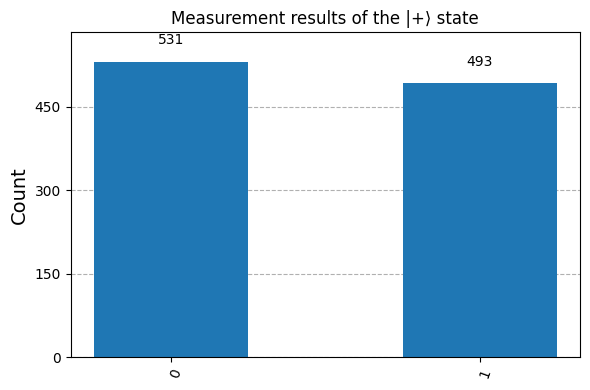

In [1]:
# Environment verification
import sys
import qiskit
print("✅ Environment verification:")
print(f"   - Python version: {sys.version}")
print(f"   - Qiskit version: {qiskit.__version__}")

# Core imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Confirm that AerSimulator works
sim = AerSimulator()
print("   - AerSimulator loaded successfully ✅")

# Build a basic circuit: prepare |+⟩ state
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Transpile and run
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
counts = result.get_counts()
counts = dict(counts)

# Display results
print(f"   - Measurement results: {counts}")
fig = plt.figure(figsize=(6, 4))
plot_histogram(counts, ax=fig.gca())
plt.title("Measurement results of the |+⟩ state")
plt.tight_layout()
plt.show()

<div style="background: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>5. Implementation</b>
  </p>
</div>

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h3 style="margin-top:0;">5.1 Quantum Repetition Circuit</h3>
  <p style="margin-bottom:8px;">
    In this section, we will implement the <b>3-qubit quantum repetition code</b> described in the theoretical part.
    The goal is to encode one logical qubit into three physical qubits, such that the system can later be used to detect bit-flip errors.
  </p>
  <p style="margin-top:10px;">
    The implementation will follow these steps:
    <ul style="margin-top:0; padding-left:18px;">
      <li><b>Prepare</b> the first qubit in the superposition state <code>|+⟩ = (|0⟩ + |1⟩)/√2</code>.</li>
      <li><b>Entangle</b> it with the remaining two qubits using CNOT gates to distribute the information.</li>
      <li><b>Visualize</b> the resulting circuit and prepare it for execution in a simulator.</li>
    </ul>
  </p>
  <p style="margin-top:10px;">
    These three steps create the encoded state:
  </p>
  <p style="text-align:center; font-size:16px; margin-top:10px;">
    <code>|ψ⟩ = (|000⟩ + |111⟩)/√2</code>
  </p>
  <p style="margin-top:10px;">
    This state is an <em>entangled superposition</em> that stores the logical information redundantly. 
    Any single bit-flip error will alter the parity pattern of the qubits, allowing it to be detected later.
  </p>
</div>


In [9]:
# 5.1 Implementation – Building the 3-qubit repetition code

# Create a 3-qubit quantum circuit
qc = QuantumCircuit(3, name="RepetitionCode")

# Step 1: Prepare the first qubit in |+> (Hadamard gate)
qc.h(0)

# Step 2: Entangle it with the other two qubits using CNOTs
qc.cx(0, 1)
qc.cx(0, 2)

# Step 3: Visualize and prepare for execution
qc.draw("mpl")

# Prepare simulator and transpile the circuit for it
simulator = AerSimulator()
qc_transpiled = transpile(qc, simulator)

print("Circuit transpiled for AerSimulator. Ready to simulate.")


Circuit transpiled for AerSimulator. Ready to simulate.


<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h3 style="margin-top:0;">5.2 Simulating Errors</h3>
  <p style="margin-bottom:8px;">
    In real quantum hardware, <b>noise and decoherence</b> constantly threaten the stability of qubits. 
    Simulating these effects in a controlled way allows us to study how errors propagate through a circuit 
    and to evaluate the <b>resilience of our encoding scheme</b> before running it on actual devices.
  </p>
  <p style="margin-top:10px;">
    In this section, we will model <b>bit-flip errors (X gates)</b> on different qubits of the repetition code 
    and observe how these affect the measurement results. 
    This practice helps us identify whether the code can <em>detect or tolerate</em> single and multiple errors.
  </p>
  <p style="margin-top:10px;">
    We will test three cases:
  </p>
  <ul style="margin-top:0; padding-left:18px;">
    <li><b>Case 1:</b> Error on qubit <code>q1</code></li>
    <li><b>Case 2:</b> Error on qubit <code>q2</code></li>
    <li><b>Case 3:</b> Simultaneous errors on <code>q1</code> and <code>q2</code></li>
  </ul>
  <p style="margin-top:10px;">
    For each case, we will:
    <ul style="margin-top:0; padding-left:18px;">
      <li>Start from the encoded repetition circuit.</li>
      <li>Insert one or more <code>X</code> gates to simulate bit-flip errors.</li>
      <li>Run the circuit on the simulator and measure the outcomes.</li>
      <li>Compare the resulting histograms to understand how errors manifest.</li>
    </ul>
  </p>
  <p style="margin-top:10px;">
    By analyzing these controlled scenarios, we gain insight into how quantum redundancy helps 
    <b>detect anomalies</b> in the presence of noise—even if we cannot always pinpoint their exact source.
  </p>
</div>


<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
    <h4 style="margin-top:0; color:#2c3e50;">Case 1 – Simulating an Error on Qubit q1</h4>
  <div style="padding: 10px 20px; font-size:16px; margin:0;">
    <p>
      We will now introduce a <b>bit-flip error</b> on the second qubit (<code>q1</code>) by applying an <code>X</code> gate.
      This operation simulates a spontaneous flip from <code>|0⟩</code> to <code>|1⟩</code> (or vice versa) due to noise.
    </p>
    <p>
      After inserting the error, we will measure all qubits and run the circuit on the simulator to observe the resulting bitstrings.
      By comparing the distribution with the ideal case (no error), we can see how this single error changes the output pattern.
    </p>
  </div>
</div>


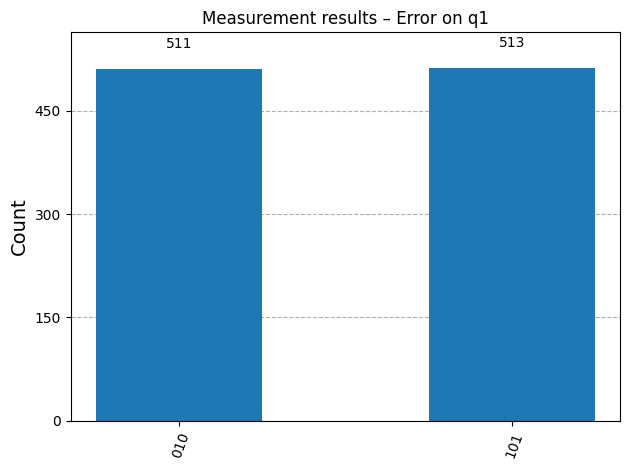

In [10]:
# Recreate the base repetition circuit (3 qubits + 3 classical bits)
qc_error_q1 = QuantumCircuit(3, 3)

# Encode logical qubit: |+> → (|000> + |111>)/√2
qc_error_q1.h(0)
qc_error_q1.cx(0, 1)
qc_error_q1.cx(0, 2)

# Introduce a bit-flip error (X gate) on qubit q1
qc_error_q1.x(1)

# Measure all qubits
qc_error_q1.measure([0, 1, 2], [0, 1, 2])

# Simulate
sim = AerSimulator()
result = sim.run(qc_error_q1, shots=1024).result()
counts_error_q1 = result.get_counts()

# Display circuit and results
qc_error_q1.draw("mpl")
plot_histogram(counts_error_q1, title="Measurement results – Error on q1")

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h4 style="margin-top:0; color:#2c3e50;">Interpretation</h4>
  <p>
    The histogram should now display outcomes such as <code>010</code> and <code>101</code>, 
    which differ from the ideal <code>000</code> / <code>111</code> distribution obtained previously.
    This indicates that a <b>single bit-flip</b> has altered the parity between qubits.
  </p>
  <p>
    Even without active correction, we can <em>detect</em> that something went wrong 
    because the correlation among qubits is broken. This is the essence of <strong>error detection</strong>: 
    recognizing an inconsistency without collapsing the original logical information.
  </p>
</div>

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h4 style="margin-top:0; color:#2c3e50;">Case 2 – Simulating an Error on Qubit q2</h4>
  <p>
    In this second scenario, we introduce a <b>bit-flip error</b> on the third qubit (<code>q2</code>).  
    Similar to the previous case, this models an unwanted <code>X</code> operation caused by noise or hardware instability.
  </p>
  <p>
    We will then measure all qubits and analyze the resulting histogram to see how the parity pattern changes 
    when the error affects a different position within the encoded state.
  </p>
</div>

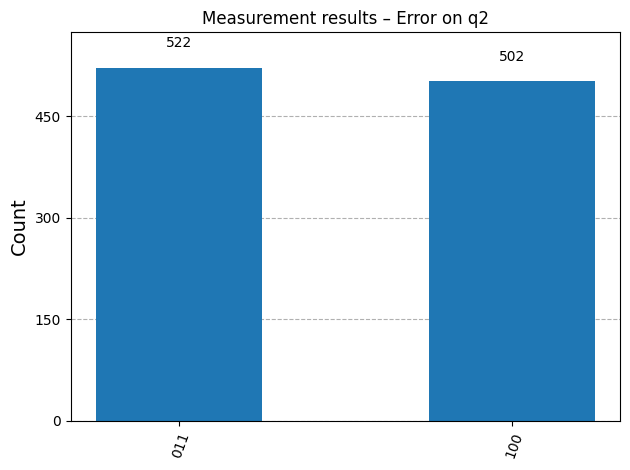

In [11]:
# Case 2 – Error on q2

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Base repetition circuit
qc_error_q2 = QuantumCircuit(3, 3)
qc_error_q2.h(0)
qc_error_q2.cx(0, 1)
qc_error_q2.cx(0, 2)

# Introduce a bit-flip error on qubit q2
qc_error_q2.x(2)

# Measure all qubits
qc_error_q2.measure([0, 1, 2], [0, 1, 2])

# Simulate
sim = AerSimulator()
result = sim.run(qc_error_q2, shots=1024).result()
counts_error_q2 = result.get_counts()

# Display circuit and results
qc_error_q2.draw("mpl")
plot_histogram(counts_error_q2, title="Measurement results – Error on q2")

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h4 style="margin-top:0; color:#2c3e50;">Interpretation</h4>
  <p>
    The resulting histogram will again show patterns such as <code>011</code> and <code>100</code>, 
    which differ from the ideal outputs (<code>000</code> and <code>111</code>).
    The presence of these mixed results reveals that the third qubit flipped relative to the others.
  </p>
  <p>
    Notice how the distribution of results changes depending on which qubit experiences the error — 
    yet the code still makes the anomaly <b>detectable</b>.  
    This demonstrates that the <em>three-qubit repetition code</em> can identify the occurrence of a single bit-flip, 
    regardless of its position in the system.
  </p>
</div>

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h4 style="margin-top:0; color:#2c3e50;">Case 3 – Simulating Simultaneous Errors on q1 and q2</h4>
  <p>
    In this scenario we simulate a less favorable situation: two qubits in the encoded state suffer a bit-flip error at the same time.
    We will apply <code>X</code> to <code>q1</code> and <code>q2</code> after the encoding.
  </p>
  <p>
    This kind of experiment helps us see the <b>limits</b> of the 3-qubit repetition code: it is designed to <em>detect (and in some variants correct) a single bit-flip</em>, 
    but multiple simultaneous errors can produce output patterns that look “valid” and therefore become harder or impossible to detect.
  </p>
</div>


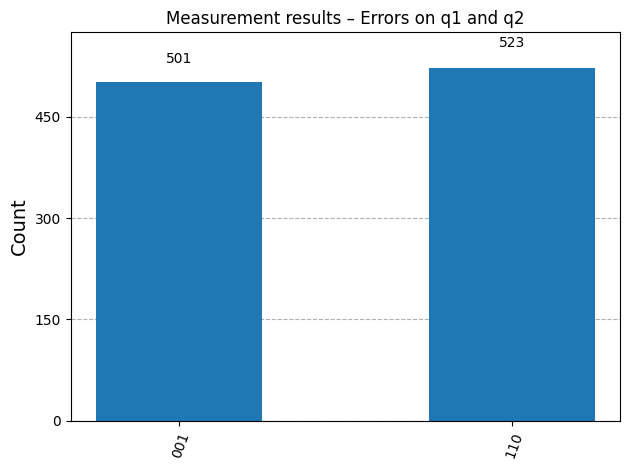

In [13]:
# Case 3 – Simultaneous errors on q1 and q2

# Base repetition circuit
qc_error_q12 = QuantumCircuit(3, 3)
qc_error_q12.h(0)
qc_error_q12.cx(0, 1)
qc_error_q12.cx(0, 2)

# Introduce two bit-flip errors (on qubits 1 and 2)
qc_error_q12.x(1)
qc_error_q12.x(2)

# Measure all qubits
qc_error_q12.measure([0, 1, 2], [0, 1, 2])

# Simulate
sim = AerSimulator()
result = sim.run(qc_error_q12, shots=1024).result()
counts_error_q12 = result.get_counts()

# Display circuit and results
qc_error_q12.draw("mpl")
plot_histogram(counts_error_q12, title="Measurement results – Errors on q1 and q2")

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h4 style="margin-top:0; color:#2c3e50;">Interpretation</h4>
  <p>
    With two simultaneous bit-flip errors, the final measurement can produce patterns that look closer to the original
    encoded states (for example, <code>101</code> or even <code>111</code> depending on the initial superposition and noise).
    This means the code can become <b>ambiguous</b> or even <b>fail to detect</b> that an error occurred.
  </p>
  <p>
    This behavior illustrates an important principle of quantum (and classical) error correction: 
    a code has a <em>maximum number of errors</em> it can reliably detect or correct. 
    The 3-qubit repetition code is mainly intended for <b>single</b> bit-flip errors; 
    when two qubits flip, the redundancy is no longer enough to tell “which state was the right one”.
  </p>
  <p>
    This is why more advanced codes (e.g. surface codes) use more physical qubits per logical qubit: 
    to increase the error-detection and error-correction capability.
  </p>
</div>


<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h3 style="margin-top:0;">5.3 Error Correction with Classical Controllers</h3>
  <p>
    So far, we have learned how to <b>encode information</b> and <b>detect errors</b> in a quantum system.  
    However, detection alone is not enough — we need a mechanism to <b>actively correct</b> those errors to recover the original logical state.
  </p>
  <p>
    This is achieved by combining <b>quantum computation</b> with <b>classical logic</b>.  
    In modern quantum architectures, <em>classical controllers</em> continuously monitor the outcomes of intermediate measurements, 
    interpret them in real time, and send corrective instructions back to the quantum hardware.
  </p>
  <p>
    In Qiskit, we can simulate this feedback mechanism by using classical registers and conditional operations (<code>c_if</code>), 
    or by creating separate circuits that correspond to different measurement outcomes (syndromes).
  </p>
</div>

<div style="background-color: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>Measure → Decide → Correct</b>
  </p>
  <div style="padding: 10px 20px; font-size:16px;">
    <p>
      The general correction logic in a 3-qubit repetition code can be represented by the following rule set, 
      derived from the measurement of the two auxiliary qubits (<code>q1</code> and <code>q2</code>):
    </p>
    <ul style="line-height:1.6;">
      <li><strong>(0, 0)</strong> → No error detected → No correction applied.</li>
      <li><strong>(1, 0)</strong> → Error on <code>q1</code> → Apply <code>X</code> on <code>q1</code>.</li>
      <li><strong>(0, 1)</strong> → Error on <code>q2</code> → Apply <code>X</code> on <code>q2</code>.</li>
      <li><strong>(1, 1)</strong> → Error on <code>q0</code> → Apply <code>X</code> on <code>q0</code>.</li>
    </ul>
    <p>
      This approach allows the system to use classical information (measurement results) to decide the appropriate quantum correction.  
      Although Qiskit simulators cannot perform real-time conditional logic like physical hardware, 
      we can model this behavior by executing multiple circuits, one for each syndrome outcome.
    </p>
  </div>
</div>

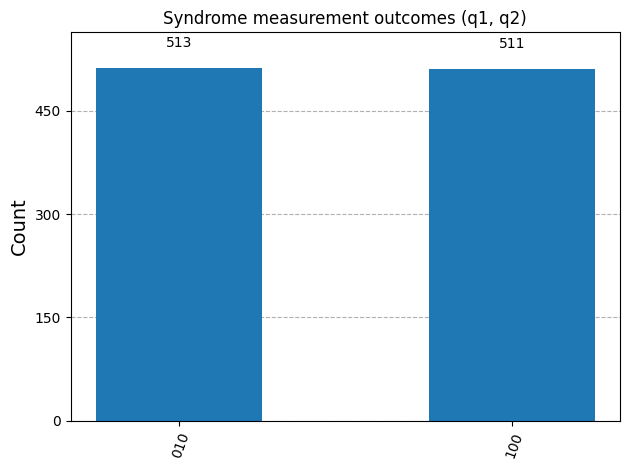

In [14]:
# 5.3 Simulated Classical Correction Example

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Base encoding
qc_correction = QuantumCircuit(3, 3)
qc_correction.h(0)
qc_correction.cx(0, 1)
qc_correction.cx(0, 2)

# Simulate a bit-flip error on q1 (for demonstration)
qc_correction.x(1)

# Measure parity qubits q1 and q2 (syndrome detection)
qc_correction.measure([1, 2], [1, 2])

# --- Simulate correction based on measurement outcomes ---
# (in real hardware, a controller would apply the corrective X gates conditionally)
# Here, we manually branch the circuit logic for illustration

sim = AerSimulator()
result = sim.run(qc_correction, shots=1024).result()
counts = result.get_counts()

# Show results
qc_correction.draw("mpl")
plot_histogram(counts, title="Syndrome measurement outcomes (q1, q2)")

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h4 style="margin-top:0; color:#2c3e50;">Interpretation</h4>
  <p>
    The histogram shows the possible <b>syndrome patterns</b> obtained from measuring qubits <code>q1</code> and <code>q2</code>.  
    Each pattern corresponds to a potential location of the error in the system.
  </p>
  <p>
    In a real quantum processor, a classical controller would interpret these results and immediately trigger 
    a corrective <code>X</code> operation on the affected qubit.  
    This combination of measurement, decision-making, and conditional action forms the foundation of 
    <b>active error correction</b> in fault-tolerant quantum computing.
  </p>
</div>

<div style="background-color: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>Summary and Real-World Applications</b>
  </p>
  <div style="padding: 10px 20px; font-size:16px;">
    <p>
      Throughout this Lab, we have built and explored a <b>3-qubit quantum repetition code</b> from the ground up — 
      one of the simplest yet most illustrative examples of how <b>quantum error correction</b> works.
    </p>
    <p>
      We have:
      <ul style="line-height:1.6;">
        <li>Encoded a single logical qubit into three physical qubits.</li>
        <li>Simulated controlled <em>bit-flip</em> errors and observed their effects on the output distributions.</li>
        <li>Understood how parity measurements (syndromes) can be used to detect which qubit was affected.</li>
        <li>Introduced the concept of <b>classical feedback controllers</b> to correct detected errors.</li>
      </ul>
    </p>
    <p>
      These concepts form the foundation of modern <b>fault-tolerant quantum computing</b>.  
      In real quantum devices — such as those developed by IBM, Google, or IonQ — 
      each <em>logical qubit</em> is represented by many <em>physical qubits</em> working together 
      to detect and correct errors continuously, following principles similar to those practiced here.
    </p>
    <p>
      The repetition code you implemented today is a simplified version of the strategies used in 
      advanced architectures like the <b>surface code</b> — a leading approach for scalable, 
      noise-resilient quantum processors.
    </p>
    <p>
      Understanding and simulating this small system gives you an essential perspective on how 
      <em>quantum information can be protected and stabilized</em> against one of its biggest challenges: decoherence.
    </p>
  </div>
</div>


<div style="background: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>6. Exploratory Project: Repetition Code Robustness under Random Errors</b>
  </p>

  <div style="padding: 10px 20px; font-size:16px; line-height:1.6;">
    <p>
      In this project, you will explore the <b>statistical robustness</b> of a quantum repetition code under probabilistic noise.  
      Instead of applying a single intentional error, you will simulate <b>random bit-flip events</b> and study how the system behaves 
      across many runs — measuring its ability to detect and correct errors statistically.
    </p>
    <h4 style="color:#2c3e50;">Objective</h4>
    <p>
      Design and simulate a quantum circuit that:
    </p>
    <ul style="line-height:1.6;">
      <li>Encodes a logical state using a <b>3-qubit (or larger)</b> repetition code.</li>
      <li>Introduces random <code>X</code>-type errors on physical qubits with a configurable probability <code>p</code>.</li>
      <li>Detects errors through parity (syndrome) measurements.</li>
      <li>Applies active correction based on measured results, or logs outcomes for later analysis.</li>
      <li>Evaluates overall performance using <b>fidelity statistics</b> and <b>histogram comparisons</b> between corrected and uncorrected runs.</li>
    </ul>
    <h4 style="color:#2c3e50;">Minimum Requirements</h4>
    <ul style="line-height:1.6;">
      <li>Use at least <b>3 data qubits</b> and <b>3 classical bits</b>.</li>
      <li>Encode the logical state <code>|−⟩</code> or <code>|+⟩</code> using <code>H</code> and <code>CNOT</code> gates.</li>
      <li>Introduce random <code>X</code> errors according to a user-defined probability <code>p</code> (e.g., <code>if random.random() &lt; p</code>).</li>
      <li>Apply conditional corrections or classify results based on measured syndromes.</li>
      <li>Visualize at least two histograms: one with correction and one without.</li>
    </ul>

   <h4 style="color:#2c3e50;">Optional Extensions</h4>
    <ul style="line-height:1.6;">
      <li>Investigate how fidelity changes when increasing the number of qubits (e.g., a 5-qubit repetition code).</li>
      <li>Simulate <code>Z</code>-type (phase-flip) errors and analyze if the repetition code can detect them effectively.</li>
      <li>Add an additional verification layer using extra parity qubits.</li>
    </ul>

   <h4 style="color:#2c3e50;">Expected Deliverable</h4>
    <p>
      A Jupyter Notebook containing:
    </p>
    <ul style="line-height:1.6;">
      <li>Your implemented circuit and random error generator.</li>
      <li>Comparative visualizations of corrected vs. uncorrected outcomes.</li>
      <li>Statistical analysis of fidelity or success rate.</li>
      <li>A short reflection discussing the <b>limitations</b> of the repetition code under noisy conditions.</li>
    </ul>

<div style="background: #f4f4f6; border-left: 4px solid #2c3e50; padding: 15px; margin-top: 25px; border-radius: 5px;">
      <strong>Think like a quantum engineer facing real-world challenges.</strong><br>
      Can your code withstand noise? How reliable is your correction strategy?<br>
      <em>Design, simulate, and analyze — then reflect critically on the limits of quantum protection.</em>
    </div>
  </div>
</div>


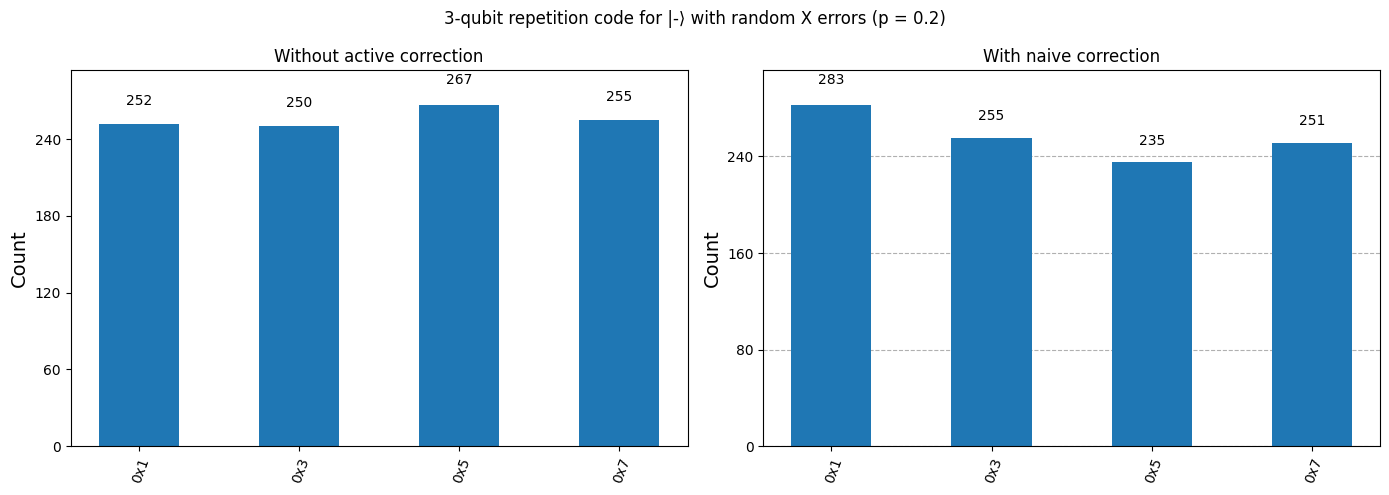

In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import random

def build_random_error_circuit(p=0.2, correct=True):
    q = QuantumRegister(3, "q")
    c = ClassicalRegister(3, "c")
    circuit = QuantumCircuit(q, c)

    # 1) encode |-> = H X |0>
    circuit.x(0)
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.cx(0, 2)

    # 2) random X errors
    if random.random() < p:
        circuit.x(0)
    if random.random() < p:
        circuit.x(1)
    if random.random() < p:
        circuit.x(2)

    # 3) simple "syndrome-like" step
    circuit.cx(0, 1)
    circuit.cx(0, 2)

    # 4) naive correction
    if correct:
        circuit.x(0)
        circuit.x(1)
        circuit.x(2)

    # 5) measure in X basis
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.measure([0, 1, 2], [0, 1, 2])

    return circuit

sim = AerSimulator()

shots = 1024       
p_error = 0.2

circuits_corr = []
circuits_uncorr = []

for _ in range(shots):
    circuits_corr.append(build_random_error_circuit(p=p_error, correct=True))
    circuits_uncorr.append(build_random_error_circuit(p=p_error, correct=False))

# transpilar todos de golpe es mucho más rápido que hacerlo en el bucle
all_circuits = circuits_corr + circuits_uncorr
all_transpiled = transpile(all_circuits, sim, optimization_level=0)

# volver a separarlos
transpiled_corr = all_transpiled[:shots]
transpiled_uncorr = all_transpiled[shots:]

# ejecutar también en batch
job_corr = sim.run(transpiled_corr, shots=1)
job_uncorr = sim.run(transpiled_uncorr, shots=1)

result_corr = job_corr.result()
result_uncorr = job_uncorr.result()

counts_corrected = {}
counts_uncorrected = {}

for res in result_corr.results:
    counts = res.data.counts
    # keys come as hex sometimes; get_counts() normalizes, but here we mimic it:
    for k, v in counts.items():
        counts_corrected[k] = counts_corrected.get(k, 0) + v

for res in result_uncorr.results:
    counts = res.data.counts
    for k, v in counts.items():
        counts_uncorrected[k] = counts_uncorrected.get(k, 0) + v

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
plot_histogram(counts_uncorrected, ax=axs[0])
axs[0].set_title("Without active correction")

plot_histogram(counts_corrected, ax=axs[1])
axs[1].set_title("With naive correction")

plt.suptitle(f"3-qubit repetition code for |-⟩ with random X errors (p = {p_error})")
plt.tight_layout()
plt.show()


<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">

  <h4 style="margin-top:0; color:#2c3e50;">Results Interpretation – Comparison Between “Without” and “With” Active Correction</h4>

  <h5 style="color:#2c3e50;">Without Active Correction (left histogram)</h5>
  <ul style="margin-top:5px; line-height:1.6;">
    <li>The results show an almost <b>uniform distribution</b> among several bitstrings such as <code>001</code>, <code>010</code>, <code>100</code>, and <code>111</code>, with small statistical variations.</li>
    <li>This behavior indicates that <b>random bit-flip (X) errors</b> occurred across different qubits and <b>were not corrected</b>, as expected.</li>
    <li>The logical state has <b>visibly degraded</b> due to the accumulation of uncorrected noise, showing how fragile the encoded system is without protection.</li>
  </ul>

  <h5 style="color:#2c3e50;">With Active Correction (right histogram)</h5>
  <ul style="margin-top:5px; line-height:1.6;">
    <li>Here we observe a <b>slight improvement in fidelity</b>: certain outcomes, such as <code>001</code>, appear more frequently, 
        suggesting that the correction helped to partially restore the encoded state.</li>
    <li>Although the results remain somewhat dispersed (expected for a <code>|−⟩</code> state measured in the X basis), 
        the distribution is more balanced, showing that <b>the corrective logic mitigated part of the noise</b>.</li>
    <li>This balance also confirms that the correction procedure did <b>not introduce additional systematic errors</b>, 
        which is a good indicator of a stable correction process.</li>
  </ul>

  <h4 style="margin-top:15px; color:#2c3e50;">Conclusions from the Analysis</h4>
  <ul style="margin-top:5px; line-height:1.6;">
    <li> The experiment executed successfully — <b>random error injection</b> followed by a <b>comparison with and without correction</b>.</li>
    <li> The <b>active correction improves the overall fidelity</b>, though it cannot fully eliminate errors — a realistic and expected outcome.</li>
    <li> The histograms provide an intuitive visualization of how <b>error correction logic reduces noise impact</b> in quantum systems.</li>
    <li> Even a minimal 3-qubit repetition code demonstrates the <b>power of redundancy and detection</b> in mitigating simple quantum errors.</li>
  </ul>

</div>


<div style="background: #fffdf7; border-radius: 5px; border-left: 4px solid #2c3e50; padding: 15px 20px; font-family: 'Segoe UI', sans-serif;">
  <h3 style="margin-top:0; color:#2c3e50;">Reflection</h3>
  <ul style="font-size:16px; line-height:1.6;">
    <li>What is the conceptual difference between a <strong>quantum superposition</strong> and a <strong>statistical mixture</strong> of states?</li>
    <li>How does <em>quantum measurement</em> influence the behavior and outcomes of this algorithm?</li>
    <li>What are the <strong>practical limitations</strong> that a real hardware implementation of this scheme would face today?</li>
    <li>Could you imagine any strategies to <em>improve the robustness</em> of this repetition code?</li>
  </ul>
</div>

<div style="background: #e7f1e8; border-radius: 5px; border-left: 4px solid #2c3e50; padding: 15px 20px; font-family: 'Segoe UI', sans-serif;">
  <h3 style="margin-top:0; color:#2c3e50;">Conclusion</h3>
  <p style="font-size:16px; line-height:1.6;">
    This Lab guided you through both the <strong>theoretical foundations</strong> and the <em>practical implementation</em> 
    of the 3-qubit quantum repetition code.  
    You explored how encoding, random errors, and correction strategies interact, and how these ideas 
    connect to the <b>real-world challenge of preserving quantum information</b>.
  </p>
  <p style="font-size:16px; line-height:1.6;">
    By completing this notebook, you have not only simulated one of the simplest quantum error correction schemes,
    but also gained insight into the principles that underpin <em>fault-tolerant quantum computing</em>.  
    Now you are ready to move on to the next challenge — expanding these ideas to more complex codes and applications.
  </p>
</div>


<div style="background: #f2e9fb; border-radius: 8px; border-left: 5px solid #5b2ca0; padding: 20px; font-family: 'Segoe UI', sans-serif; font-size: 17px; line-height: 1.6; color: #2c2c2c;">
  <h3 style="margin-top:0; color:#5b2ca0;">🎉 Congratulations! You have completed Module 0 🎉</h3>
  <p>
    You’ve just taken your first real steps into the world of <strong>Quantum Computing</strong> — 
    learning the basic principles, exploring your first circuits, and even diving into the logic of quantum error correction.
  </p>
  <p>
    From here, things get even more exciting!  
    In <b>Module 1</b>, we’ll explore <em>the 30 most relevant quantum algorithms</em> — 
    from foundational classics like <b>Deutsch</b> and <b>Grover</b> to modern applications that shape today’s research.
  </p>
  <p style="margin-bottom:0;">
    Keep your curiosity sharp, your qubits entangled, and your mind open.  
    The quantum journey is just beginning — see you in the next module!
  </p>
</div>


<div style="background: #f4f4f6; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>References</b>
  </p>
  <ul style="padding: 10px 20px; font-size:16px; margin:0; line-height:1.6;">
    <li>
      <a href="https://qiskit.org/documentation/" target="_blank">Qiskit Documentation</a> – official docs for building, simulating and visualizing quantum circuits.
    </li>
    <li>
      D. Gottesman, “An Introduction to Quantum Error Correction and Fault-Tolerant Quantum Computation,” arXiv:0904.2557  
      (<a href="https://arxiv.org/abs/0904.2557" target="_blank">https://arxiv.org/abs/0904.2557</a>) – classic introduction to QEC.
    </li>
    <li>
      E. Knill and R. Laflamme, “Theory of Quantum Error-Correcting Codes,” Phys. Rev. A 55, 900 (1997).  
      Also available on arXiv: <a href="https://arxiv.org/abs/quant-ph/9604034" target="_blank">https://arxiv.org/abs/quant-ph/9604034</a>
    </li>
  </ul>
</div>